
# 项目：TMDB_Movies 调查数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：我将在这份报告中，探索了以下几个问题：

1、popularity，budget，revenue，vote_count，vote_average，runtime之间有相关性么？（按常理来说，基本都是正相关关系）;电影受欢迎程度跟这些特征有什么关系。

2、随时间变化，电影的风格发生了哪些变化？在电影业的发展过程中有没有出现特殊的转折时间点？哪种类型的电影最受欢迎？

3、不同类型电影之间，时长有变化么？

4、哪种类型的电影的产出/投入比最高？

5、最高产的电影公司，导演，演员分别是？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

In [2]:
df=pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## 数据清洗

In [4]:
## 查看是否有重复值
df.duplicated().sum()

1

In [5]:
## 删除重复值
df.drop_duplicates(inplace=True)

In [6]:
## 再次检查
df.duplicated().sum()

0

In [7]:
## 查看详细的缺失数据
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **提示**：在整个研究过程中，genres 是一个重要的指标，我们提取出genres为空值的dataframe，看看这些空值数据有什么特点，是不是可以用'original_title','tagline','keywords','overview'找到线索，然后填充。

In [8]:
df_genres_isnull=df[df['genres'].isnull().values==True]
df_genres_isnull.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.0,0.0


In [9]:
df_genres_isnull.isnull().sum()

id                       0
imdb_id                  2
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     1
homepage                18
director                 2
tagline                 18
keywords                18
overview                 1
runtime                  0
genres                  23
production_companies    14
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [10]:
df_genres_isnull[['tagline','keywords','overview','original_title']].head(3)

,tagline,keywords,overview,original_title
424,NaN,NaN,"Italian remake of the Mexican 2013 hit, ""We th...",Belli di papÃ
620,NaN,NaN,A woman finds a VHS tape on her doorstep that ...,All Hallows' Eve 2
997,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",Star Wars Rebels: Spark of Rebellion


 1、能直接找到线索的关键columns 如 'tagline','keywords'有18个缺失，将近18/23=78% 的值缺失，所以要想通过 tagline','keywords','original_title'找到线索，非常耗时，这里暂且不讨论。

2、genres的空值为23，总体比例为：23/10866=0.2%

 于是我决定删除 genres为空的所有行

In [11]:
df.dropna(subset=['genres'],inplace=True)

In [12]:
df.shape

(10842, 21)

In [13]:
## 删除不需要的列
df.drop(['imdb_id','original_title','homepage','tagline','keywords','overview',
         'budget_adj','revenue_adj','release_date'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
id                      10842 non-null int64
popularity              10842 non-null float64
budget                  10842 non-null int64
revenue                 10842 non-null int64
cast                    10767 non-null object
director                10800 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


In [15]:
#  修改genre的数据类型

In [15]:
## 将generes的每一个风格类型单独为一列,同一电影的不同genre的id相同
df_genres=df.join(df.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1, drop=True).rename('genre')).reset_index(drop=True)
#删除'genres' column
df_genres.drop('genres',axis=1,inplace=True)

In [16]:
## 检查df_genres的前几行，查看genre数据类型是否修改成功
df_genres.head(2)

,id,popularity,budget,revenue,cast,director,runtime,production_companies,vote_count,vote_average,release_year,genre
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Action
1,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Adventure


In [17]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 12 columns):
id                      26955 non-null int64
popularity              26955 non-null float64
budget                  26955 non-null int64
revenue                 26955 non-null int64
cast                    26831 non-null object
director                26864 non-null object
runtime                 26955 non-null int64
production_companies    24757 non-null object
vote_count              26955 non-null int64
vote_average            26955 non-null float64
release_year            26955 non-null int64
genre                   26955 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 2.5+ MB


<a id='eda'></a>
## Q1 电影的欢迎程度跟哪些变量密切相关

###  Q1.1、popularity，budget，revenue，vote_count，vote_average，runtime之间的关系

In [18]:
df_correlation=df[['popularity','vote_average','vote_count','budget','revenue']]
corr = df_correlation.corr()
corr

,popularity,vote_average,vote_count,budget,revenue
popularity,1.000000,0.210432,0.800786,0.545271,0.663268
vote_average,0.210432,1.000000,0.254698,0.081729,0.173254
vote_count,0.800786,0.254698,1.000000,0.632601,0.791122
budget,0.545271,0.081729,0.632601,1.000000,0.734851
revenue,0.663268,0.173254,0.791122,0.734851,1.000000


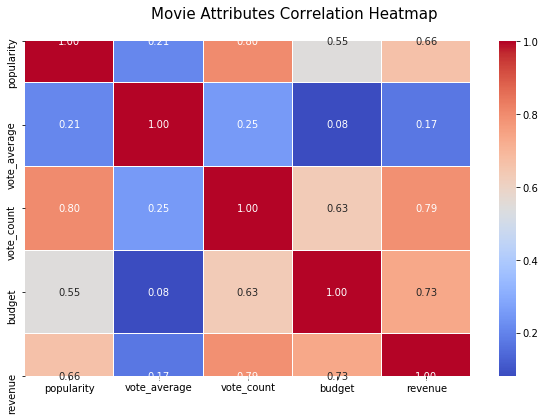

In [19]:
fig, ax = plt.subplots(figsize=(10, 6)) 
hm = sns.heatmap(corr,annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05) 
fig.subplots_adjust(top=0.90) 
fig.suptitle('Movie Attributes Correlation Heatmap', fontsize=15);

这些特征相互之间都呈正相关关系，其中受欢迎程度与评分人数有较强的正相关关系

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210708F1508>,
      dtype=object)

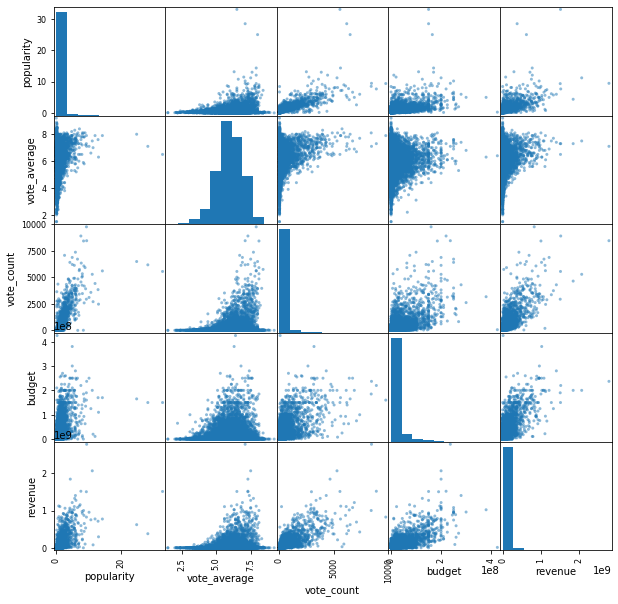

In [20]:
pd.plotting.scatter_matrix(df_correlation,figsize=(10,10))

> 可以看出，popularity','budget','revenue','vote_count','vote_average之间的相互联系：
受欢迎度，评级次数，评价均分，收入，预算之间呈正相关的关系。
电影评次与票房收入相关性最高
电影预算于票房收入高度相关
受欢迎程度与收入之间也高度相关

> 这里还有一个问题，vote_average，popularity 都表示受欢迎程度，但是以哪个为基准呢？查看一下vote_average和popular个子的分布图

Text(0.5, 1.0, 'The distribution of vote_average')

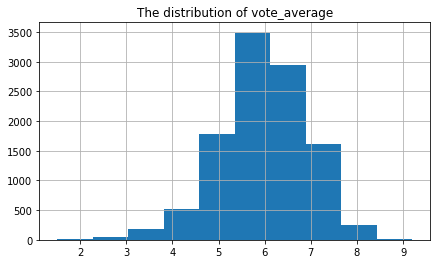

In [21]:
#'vote_average' 数据的分布
plt.figure(figsize=(7,4))
df.vote_average.hist();
plt.title('The distribution of vote_average')

Text(0.5, 1.0, 'The distribution of popularity')

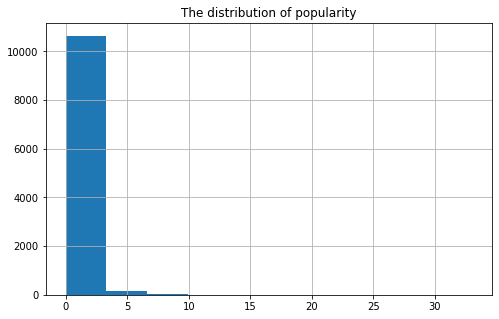

In [22]:
#'popularity' 的分布
plt.figure(figsize=(8,5))
df.popularity.hist();
plt.title('The distribution of popularity')

Text(0.5, 1.0, 'The distribution of vote_count')

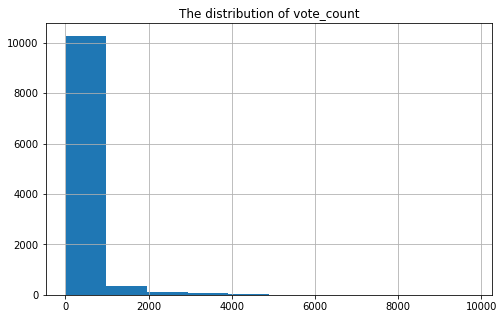

In [23]:
plt.figure(figsize=(8,5))
df.vote_count.hist()
plt.title('The distribution of vote_count')

In [25]:
## 可以看出，vote_average，的数据分布的更均匀一些，所以，在之后的分析中，用受欢迎度用popularity 来表示

### Q1.2、更具体地查看一下，受欢迎程度与收入之间的关系

In [24]:
#查看min, 25%, 50%, 75%, max 
df.vote_average.describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [25]:
## 用四分位数将数据分成四组
bin_edges=[1.5,5.4,6.0,6.6,9.2]
bin_names=['low','medium','mod_high','high']

In [26]:
#创建 user rating columns
df['user_rating']=pd.cut(df['vote_average'],bin_edges,labels=bin_names)
#查看前几行，看是否成功
df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,user_rating
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,mod_high
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,high
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,mod_high
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,high
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,high


In [27]:
df_mean_revenue=df.groupby('user_rating').revenue.mean()
df_mean_revenue

user_rating
low         1.308234e+07
medium      3.481590e+07
mod_high    4.992210e+07
high        6.468755e+07
Name: revenue, dtype: float64

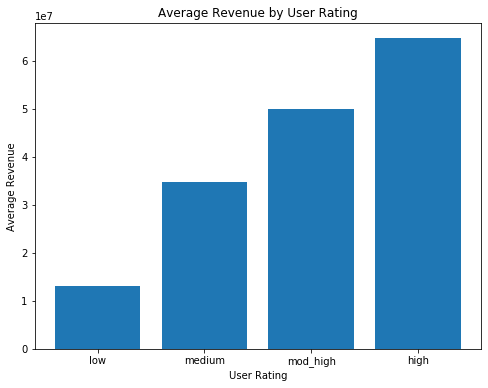

In [28]:
## 画出每个评分级别的 收入柱形图
locations=[1,2,3,4]
heights=df_mean_revenue
labels=['low','medium','mod_high','high']
plt.figure(figsize=(8,6))
ax1=plt.subplot(1,1,1)
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Revenue by User Rating')
plt.xlabel('User Rating')
plt.ylabel('Average Revenue');

> 评分越高，收入越高

### Q1.3  更具体地查看投入与电影收益之间地关系

In [29]:
df[['revenue','budget']].corr()

,revenue,budget
revenue,1.000000,0.734851
budget,0.734851,1.000000


Text(0.5, 1.0, ' the relation between Revenue and Budget ')

<Figure size 720x432 with 0 Axes>

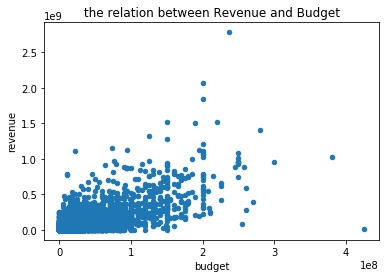

In [30]:
plt.figure(figsize=(10,6))
df.plot(x='budget',y='revenue',kind='scatter');
plt.title(' the relation between Revenue and Budget ')

>budget 和revenue之间地相关度为0.73，正相关。

## Q2 电影风格随时间变化趋势
### 随时间变化，哪种类型的电影最受欢迎？在电影业的发展过程中有没有出现特殊的转折时间点

In [31]:
df_genres['genre'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genre, dtype: int64

In [32]:
df_genre_count=df_genres[['id','release_year','genre']]
df_a=pd.pivot_table(df_genre_count,index=['release_year'], columns=['genre'],aggfunc='count')
df_a.head(4)

id                                                            \
genre        Action Adventure Animation Comedy Crime Documentary Drama Family   
release_year                                                                    
1960            8.0       5.0       NaN    8.0   2.0         NaN  13.0    3.0   
1961            7.0       6.0       1.0   10.0   2.0         NaN  16.0    5.0   
1962            8.0       7.0       NaN    5.0   3.0         NaN  21.0    2.0   
1963            4.0       7.0       1.0   13.0   4.0         NaN  13.0    3.0   

                                                                   \
genre        Fantasy Foreign History Horror Music Mystery Romance   
release_year                                                        
1960             2.0     1.0     5.0    7.0   1.0     NaN     6.0   
1961             2.0     1.0     3.0    3.0   2.0     1.0     7.0   
1962             1.0     1.0     4.0    5.0   1.0     4.0     5.0   
1963             2.0     2.0     4.0    9.0   NaN     6.0     8.0   

                                                             
genre        Science Fiction TV Movie Thriller  War Western  
release_year                                                 
1960                     3.0      NaN      6.0  2.0     6.0  
1961                     4.0      NaN      NaN  2.0     3.0  
1962                     2.0      NaN      7.0  3.0     3.0  
1963                     2.0      NaN     10.0  1.0     2.0

Text(0, 0.5, 'quantity')

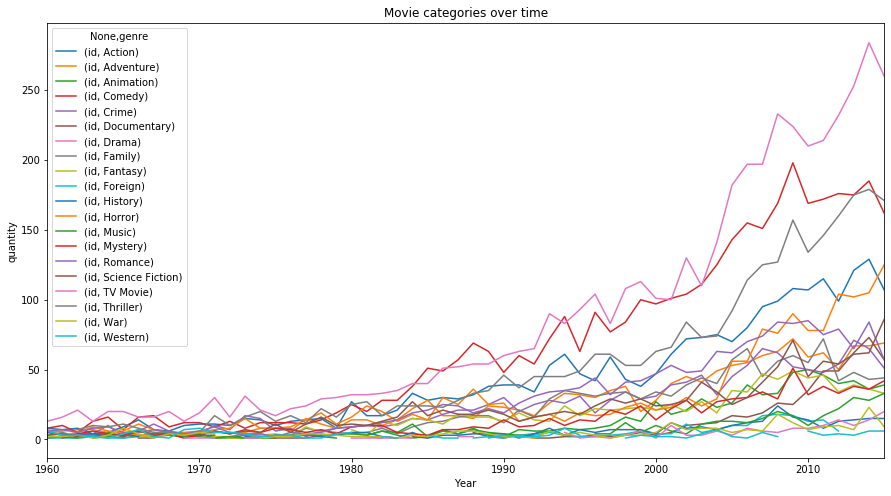

In [33]:
plt.figure(figsize=(15,8))
ax1=plt.subplot(1,1,1)
df_a.plot(kind='line',label='genre',ax=ax1)
plt.title('Movie categories over time')
plt.xlabel('Year')
plt.ylabel('quantity')

In [34]:
df_genre_count=df_genres[['id','release_year','genre']]
df_b=pd.pivot_table(df_genre_count,index=['genre'], columns=['release_year'],aggfunc='count')
df_b.head(4)

id                                                     ...  \
release_year 1960  1961 1962  1963  1964 1965  1966  1967 1968  1969  ...   
genre                                                                 ...   
Action        8.0   7.0  8.0   4.0   5.0  9.0  14.0   7.0  6.0  10.0  ...   
Adventure     5.0   6.0  7.0   7.0   5.0  6.0  11.0   7.0  5.0   5.0  ...   
Animation     NaN   1.0  NaN   1.0   2.0  1.0   3.0   2.0  3.0   3.0  ...   
Comedy        8.0  10.0  5.0  13.0  16.0  7.0  16.0  17.0  9.0  12.0  ...   

                                                                             \
release_year   2006   2007   2008   2009   2010   2011   2012   2013   2014   
genre                                                                         
Action         80.0   95.0   99.0  108.0  107.0  115.0   99.0  121.0  129.0   
Adventure      55.0   60.0   63.0   72.0   59.0   62.0   50.0   67.0   67.0   
Animation      39.0   32.0   33.0   48.0   50.0   46.0   40.0   42.0   36.0   
Comedy        155.0  151.0  169.0  198.0  169.0  172.0  176.0  175.0  185.0   

                     
release_year   2015  
genre                
Action        107.0  
Adventure      69.0  
Animation      39.0  
Comedy        162.0  

[4 rows x 56 columns]

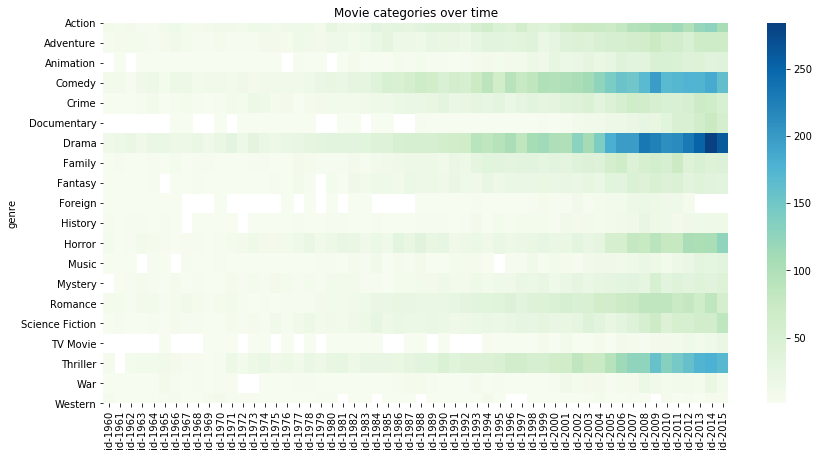

In [35]:
plt.figure(figsize=(14,7));
sns.heatmap(df_b,cmap='GnBu')
plt.title("Movie categories over time")
plt.xlabel("");

大概可以看出，自1993年以后，Drama,Comedy,Thriller依次越来越受欢迎；而其他类型的电影在1993年以前，基本在100部以下。

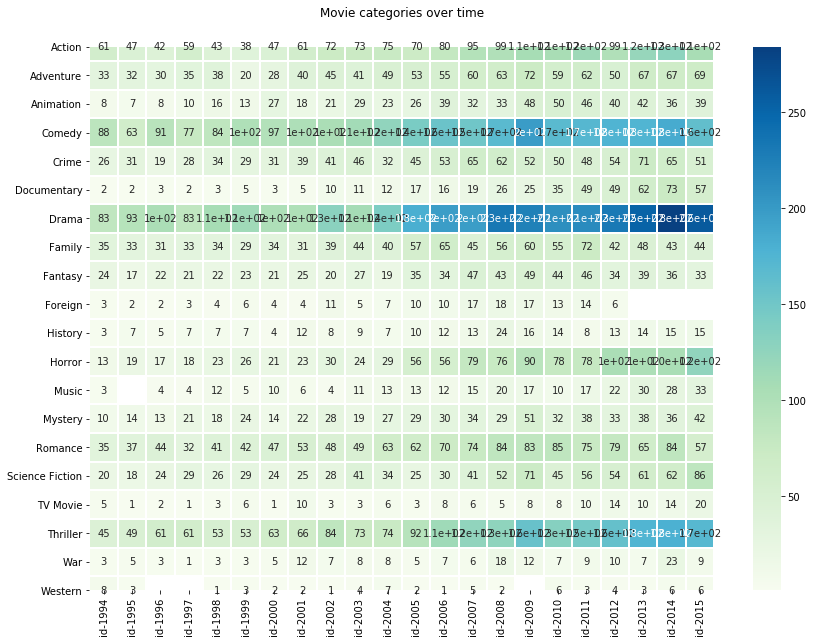

In [36]:
data=df_genre_count[df_genre_count['release_year']>1993]
df_c=pd.pivot_table(data,index=['genre'], columns=['release_year'],aggfunc='count')
plt.figure(figsize=(14,10));
cmap=sns.diverging_palette(200,20,sep=20,as_cmap=True)
sns.heatmap(df_c,annot=True,cmap='GnBu',linewidth=1)
plt.title("Movie categories over time",pad=30)
plt.xlabel("");
plt.ylabel("");

可以清楚的看到截至1996年，Drama类型的电影首次破百。拍摄的比较多的题材按顺序如下：Drama，Comedy，Thriller，Action；

而像western,foreign,war题材的拍摄的最少

##  Q3 每种类型的电影时长之间差异

Text(0, 0.5, 'counts')

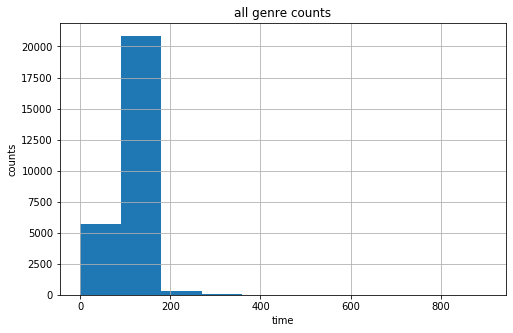

In [37]:
## 查看电影时长的分布，有大量的0值
plt.figure(figsize=(8,5))
df_genres['runtime'].hist()
plt.title('all genre counts')
plt.xlabel('time')
plt.ylabel('counts')

In [38]:
### 删除runtime数据为0的dataframe
df_runtime=df_genres[(df_genres[['runtime']]!=0).all(axis=1)]
df_runtime.head(3)

,id,popularity,budget,revenue,cast,director,runtime,production_companies,vote_count,vote_average,release_year,genre
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Action
1,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Adventure
2,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Science Fiction


Text(0, 0.5, 'time')

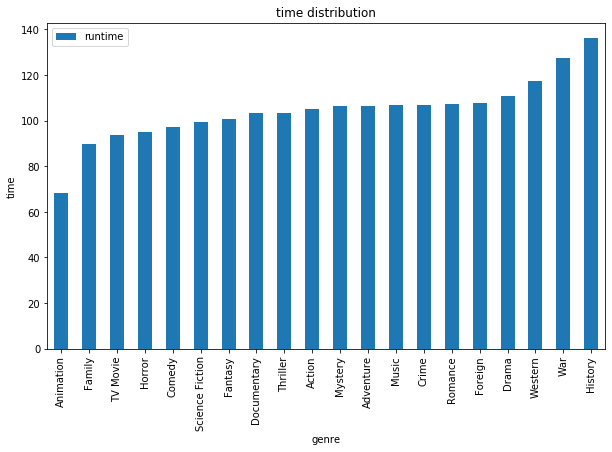

In [39]:
plt.figure(figsize=(10,6))
ax1=plt.subplot(1,1,1)
df_runtime[['genre','runtime']].groupby('genre').mean().sort_values(by='runtime',ascending=True).plot(kind='bar',label='genre',ax=ax1)
plt.title('time distribution')
plt.xlabel('genre')
plt.ylabel('time')

>可以看出history，war，western，drama的时间最长，基本在110minutes以上，其余的基本在90~100minutes之间；动画片的时间最短平均为70minute，

## Q4  哪种类型的电影收入比最高？

In [40]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 12 columns):
id                      26955 non-null int64
popularity              26955 non-null float64
budget                  26955 non-null int64
revenue                 26955 non-null int64
cast                    26831 non-null object
director                26864 non-null object
runtime                 26955 non-null int64
production_companies    24757 non-null object
vote_count              26955 non-null int64
vote_average            26955 non-null float64
release_year            26955 non-null int64
genre                   26955 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 2.5+ MB


In [41]:
## 1、删除任何投入，产出数据为0的数据
df_budget_revenue=df_genres[(df_genres[['budget','revenue']]!=0).all(axis=1)]
## 将  profit,budget,revenue转换为million，并转换为‘inr’
df_budget_revenue['profit']=((df_budget_revenue['revenue']-df_budget_revenue['budget'])/1000000).astype(int)
df_budget_revenue.head(3)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,popularity,budget,revenue,cast,director,runtime,production_companies,vote_count,vote_average,release_year,genre,profit
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Action,1363
1,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Adventure,1363
2,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,Science Fiction,1363


In [42]:
df_budget=df_budget_revenue.groupby('genre').budget.mean()
df_revenue=df_budget_revenue.groupby('genre').revenue.mean()
#投入产出比：
revenue_budget_ratio=(df_revenue/df_budget).sort_values(ascending=False)
revenue_budget_ratio

genre
TV Movie           8.400000
Documentary        4.641359
Animation          3.341998
Family             3.251541
Music              3.206400
Romance            3.143793
Adventure          3.121179
Fantasy            3.086003
Horror             3.085579
Comedy             2.939877
Science Fiction    2.928067
Action             2.774201
Drama              2.649588
Thriller           2.620767
Mystery            2.596580
Crime              2.547032
War                2.509288
History            1.999872
Western            1.654455
Foreign            1.178703
dtype: float64

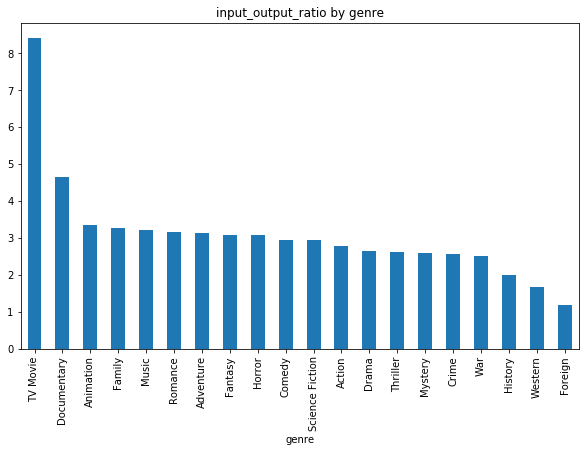

In [43]:
fig=plt.figure(figsize=(10,6))
ax1=plt.subplot(111)
lt=revenue_budget_ratio.plot(kind='bar',title='input_output_ratio by genre')
lt.set_xlabel=('genre')
lt.set_ylabel=('ratio')

可以看出 TVmovie的产出/投入比最高为8.4，其次Documentary4.6，Foreign           Western，History最低，在2以下；表明在投入相同的资本时，TVmovie，Documentary更容易获利。

## Q5  最高产的电影公司，演员，导演分别是？

In [44]:
df['id'].duplicated().sum()

0

In [45]:
df.head(2)

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,user_rating
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,mod_high
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,high


In [55]:
## 因为 "id"已经没有重复数据，所以，dataframe中的公司数量最多的代表产量最高的公司

In [46]:
company=pd.Series(df.production_companies.str.cat(sep='|').split('|')).value_counts()
a=company.head(10).sort_values(ascending = True)
a

Columbia Pictures Corporation             160
Touchstone Pictures                       178
Walt Disney Pictures                      213
Metro-Goldwyn-Mayer (MGM)                 218
New Line Cinema                           219
Columbia Pictures                         272
Twentieth Century Fox Film Corporation    282
Paramount Pictures                        431
Warner Bros.                              509
Universal Pictures                        522
dtype: int64

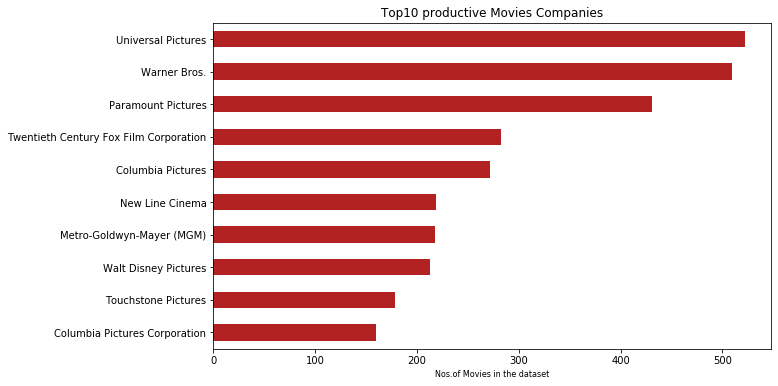

In [47]:
lt = a.plot.barh(color = 'firebrick', fontsize = 10)
lt.set(title = 'Top10 productive Movies Companies')
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '8')
lt.figure.set_size_inches(10, 6)
plt.show()

In [48]:
director=pd.Series(df.director.str.cat(sep='|').split('|')).value_counts()
director.head(10)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      21
Tim Burton           20
Brian De Palma       20
dtype: int64

In [49]:
cast=pd.Series(df.cast.str.cat(sep='|').split('|')).value_counts()
cast.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Susan Sarandon       48
dtype: int64

以上分别是前10位最高产的电影公司，导演，演员

<a id='conclusions'></a>
## 结论

1、可以看出vote和pop之间呈正相关。电影评次与票房收入相关性最高；电影预算和票房收入也表现出正相关，但是并没有那么明显，正相关表明电影评次越多，票房收入越高，电影预算越多，票房收入越多。

2、自1993年以前，各个类别的电影上映量都在100部以下，数据量少，看不出有什么特别的偏好，1993年后对电影的上映量有了明显的分水岭，Drama,Comedy,Thriller依次上映的越来越多；在1996年，这一年，Drama这一单独类型的电影首次破百。之后，电影的上映量逐步分化出三个阶梯，第一阶梯：Drama，Comedy，Thriller，Action的上映量最多；第三阶梯：war，history，foreign，TVmovie的上映量最少。

3、可以看出history，war，western，drama的播放时间最长，平均时间基本在110minutes以上，其余的平均时间基本在90~100minutes之间；动画片的平均时间最短为70minute。


6、最高产的前5位电影公司是：Columbia Pictures Corporation ,Touchstone Pictures ,Walt Disney Pictures,Metro-Goldwyn-Mayer (MGM),New Line Cinema 

最高产的前5位导演是：Woody Allen ,Clint Eastwood, Martin Scorsese,Steven Spielberg, Ridley Scott  

最高产的前5位演员是：Robert De Niro ，Samuel L. Jackson ，Bruce Willis  ，Nicolas Cage ，Michael Caine


**整个数据探索流程中的局限性：**


1、在第一个问题探索popularity，budget，revenue，vote_count，vote_average，runtime之间的相关性时，只有vote_average呈正态分布，所以，在这个问题的探索中是仅仅是对数据的现象浅显描述，不能作为结论。如果要论证，还应该对每一个特征做数据清洗，处理，再深入研究，进一步得出结果。

2、在研究哪种类型的电影最受欢迎，在电影业的发展过程中有没有出现特殊的转折时间点，这个问题时，删除了23行genres为空的数据，23/10866=0.002，相对于整体删除的数据很少；
 
 在作图时，时间颗粒度也较细，结论相对可靠。

3、在对不同类别电影对应的时长的研究中，得出的结果，由于在分析过程中，我们求取的是同一类型电影的平均时长，只能说有总体代表性，个别类型电影不一定符合以上特点。


加上在genre的处理中，由于一个电影id对应不同的genres，也就是说，一部单独的电影，对应好几个风格，所以具体到某一单独的电影上，不一定符合以上特点。

譬如，动画片的时长整体小于历史剧的时长，但不是所有的动画片时长都小于历史剧时长。


4、在不同风格的电影产出投入比的研究中，仅选取了部分数据（产出，投入电影风格），我们忽略了时间维度，事实上，某一类型的电影，投入产出比，有可能会随着时间的变化有所变化。所以这个结果代表1994-2015年间，整体上，某一类型的电影，投入产出比。

5、最高产的公司，导演，演员结论基本可靠，没有太多偏差，因为在这个问题的探索中，没有删除数据，也没有其他特殊的影响因子。
